In [5]:
# !pip install scikit-learn

In [93]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import openvino


ModuleNotFoundError: No module named 'matplotlib'

In [72]:

# # 이미지 하위 디렉토리 4개 폴더에 있는 훈련 이미지를 반복합니다.
# train_path = "chest_xray/train/"
# test_path = "chest_xray/test/"
# val_path = "chest_xray/val/"

# for label in ('NORMAL','PNEUMONIA'):
#     print ("Loading training images for the label: "+label)
    
#     # 하위 폴더의 모든 이미지를 읽어옵니다.
#     for filename in os.listdir(train_path+label+"/"): 
#         img = cv2.imread(train_path+label+"/"+filename)
#         trainX.append(img)
#         trainY.append(label)

# for label in ('NORMAL','PNEUMONIA'):
#     print ("Loading training images for the label: "+label)
    
#     # 하위 폴더의 모든 이미지를 읽어옵니다.
#     for filename in os.listdir(test_path+label+"/"): 
#         img = cv2.imread(test_path+label+"/"+filename)
#         testX.append(img)
#         testY.append(label)
        
# for label in ('NORMAL','PNEUMONIA'):
#     print ("Loading training images for the label: "+label)
    
#     # 하위 폴더의 모든 이미지를 읽어옵니다.
#     for filename in os.listdir(val_path+label+"/"): 
#         img = cv2.imread(val_path+label+"/"+filename)
#         valX.append(img)
#         valY.append(label)
        

    
trainX = []
trainY = []
testX = []
testY = []
valX = []
valY = []

# 이미지 크기를 설정
new_image_size = (150, 150)
class_name = ('NORMAL', 'PNEUMONIA')

def load_and_preprocess_images(data_path, label):
    images = []
    labels = []
    
    for folder in class_name:
        folder_path = os.path.join(data_path, folder)
        
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
           
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, new_image_size)  # 이미지 크기 조정
            img = img / 255.0  # 이미지 값을 0에서 1 사이로 정규화
            images.append(img)
            labels.append(class_name.index(folder))
               
    return np.array(images), np.array(labels)

# 훈련 데이터 로드 및 전처리
trainX, trainY = load_and_preprocess_images("chest_xray/train", "train")
# print(trainY)

# 테스트 데이터 로드 및 전처리
testX, testY = load_and_preprocess_images("chest_xray/test", "test")

# 검증 데이터 로드 및 전처리
valX, valY = load_and_preprocess_images("chest_xray/val", "validation")


[0 0 0 ... 1 1 1]


In [73]:
trainX.shape

(5210, 150, 150)

In [74]:
trainY

array([0, 0, 0, ..., 1, 1, 1])

In [75]:
# 이미지 데이터의 형태 조정
# trainX = np.array(trainX)  # 이미지 데이터를 넘파이 배열로 변환
trainX = trainX.reshape(trainX.shape[0], 150, 150, 1)  # 4D 형태로 변환

# testX = np.array(testX)
testX = testX.reshape(testX.shape[0], 150, 150, 1)

# valX = np.array(valX)
valX = valX.reshape(valX.shape[0], 150, 150, 1)

In [76]:
trainX.shape

(5210, 150, 150, 1)

In [113]:
# CNN 모델 생성

from tensorflow.keras.constraints import Constraint
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import BatchNormalization 

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3, 3), input_shape=(150, 150, 1), activation = 'relu', padding = 'same'))
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(SeparableConv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(SeparableConv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(SeparableConv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(SeparableConv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(SeparableConv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(SeparableConv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))
model.add(SeparableConv2D(filters = 256, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(SeparableConv2D(filters = 256, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))
model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(rate = 0.7))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.3))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [114]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 150, 150, 16)      160       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 150, 150, 16)      2320      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
separable_conv2d_10 (Separab (None, 75, 75, 32)        688       
_________________________________________________________________
separable_conv2d_11 (Separab (None, 75, 75, 32)        1344      
_________________________________________________________________
batch_normalization_4 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 37, 37, 32)      

In [115]:
# 모델 컴파일. 손실 함수, 옵티마이저, 메트릭 정의
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [116]:
# 모델 훈련
model.fit(trainX, trainY, validation_data=(valX, valY), epochs=10)


Train on 5210 samples, validate on 16 samples
Epoch 1/10
5210/5210 [==============================] - 257s 49ms/sample - loss: 0.3052 - acc: 0.8693 - val_loss: 0.9993 - val_acc: 0.5000
Epoch 2/10
5210/5210 [==============================] - 244s 47ms/sample - loss: 0.1809 - acc: 0.9345 - val_loss: 1.0247 - val_acc: 0.5000
Epoch 3/10
5210/5210 [==============================] - 237s 45ms/sample - loss: 0.1502 - acc: 0.9480 - val_loss: 1.3127 - val_acc: 0.5000
Epoch 4/10
5210/5210 [==============================] - 260s 50ms/sample - loss: 0.1046 - acc: 0.9607 - val_loss: 3.8383 - val_acc: 0.5000
Epoch 5/10
5210/5210 [==============================] - 239s 46ms/sample - loss: 0.0901 - acc: 0.9641 - val_loss: 0.3915 - val_acc: 0.7500
Epoch 6/10
5210/5210 [==============================] - 296s 57ms/sample - loss: 0.0762 - acc: 0.9737 - val_loss: 8.1990 - val_acc: 0.5000
Epoch 7/10
5210/5210 [==============================] - 251s 48ms/sample - loss: 0.0679 - acc: 0.9768 - val_loss: 1.2466

In [118]:
# 테스트 데이터로 모델 평가. 손실과 정확도 출력
test_loss, test_acc = model.evaluate(testX, testY, verbose=2)
print('테스트 loss:', test_loss, '테스트 정확도:', test_acc)

624/624 - 3s - loss: 0.6164 - acc: 0.8045
테스트 loss: 0.61643765709148 테스트 정확도: 0.80448717


In [119]:
# 예측
predictions = model.predict(testX)

In [102]:
# !pip install matplotlib

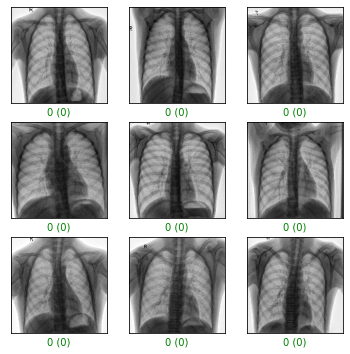

In [120]:
import matplotlib.pyplot as plt

# 예측 결과 시각화
num_rows = 3
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(testX[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    predicted_label = np.argmax(predictions[i])
    true_label = testY[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(predicted_label, true_label), color=color)
plt.show()

In [104]:
from sklearn.metrics import confusion_matrix, classification_report

# 예측 결과를 레이블로 변환
predicted_Y = [1 if prediction > 0.5 else 0 for prediction in predictions]

# 혼동 행렬 생성
cm = confusion_matrix(testY, predicted_Y)

# 분류 보고서 생성
report = classification_report(testY, predicted_Y, target_names=["NORMAL", "PNEUMONIA"])

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)



Confusion Matrix:
[[ 75 159]
 [  2 388]]

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.97      0.32      0.48       234
   PNEUMONIA       0.71      0.99      0.83       390

    accuracy                           0.74       624
   macro avg       0.84      0.66      0.66       624
weighted avg       0.81      0.74      0.70       624

